In [89]:
from google.colab import drive
drive.mount('/content/drive', force_remount=True)

Mounted at /content/drive


In [0]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from matplotlib import cm, rc
pd.options.display.max_rows = 50

In [0]:
df = pd.read_csv('/content/drive/My Drive/Why Do You Play Fighting Games(Responses).csv',skiprows=1,
                 names=['timestamp','overall_cost', 'overall_competition', 'overall_friends','overall_community','overall_controller',
                        'overall_gameplay','overall_characters','overall_brand','additional_reasons','game1','game1_cost',
                        'game1_scence','game1_friends', 'game1_netplay', 'game1_gameplay','game1_characters','game1_dev_support',
                        'game1_brand','game1_music','game1_visual','game2','game2_cost', 'game2_scence','game2_friends',
                        'game2_netplay', 'game2_gameplay','game2_characters','game2_dev_support','game2_brand','game2_music',
                        'game2_visual','game3','game3_cost', 'game3_scence','game3_friends','game3_netplay', 'game3_gameplay',
                        'game3_characters','game3_dev_support','game3_brand','game3_music','game3_visual','game4','game4_cost',
                        'game4_scence','game4_friends','game4_netplay', 'game4_gameplay','game4_characters','game4_dev_support',
                        'game4_brand','game4_music','game4_visual','game5','game5_cost', 'game5_scence','game5_friends',
                        'game5_netplay', 'game5_gameplay','game5_characters','game5_dev_support','game5_brand','game5_music',
                        'game5_visual','additional_thoughts','name','email','kiss'])

In [92]:
df.columns

Index(['timestamp', 'overall_cost', 'overall_competition', 'overall_friends',
       'overall_community', 'overall_controller', 'overall_gameplay',
       'overall_characters', 'overall_brand', 'additional_reasons', 'game1',
       'game1_cost', 'game1_scence', 'game1_friends', 'game1_netplay',
       'game1_gameplay', 'game1_characters', 'game1_dev_support',
       'game1_brand', 'game1_music', 'game1_visual', 'game2', 'game2_cost',
       'game2_scence', 'game2_friends', 'game2_netplay', 'game2_gameplay',
       'game2_characters', 'game2_dev_support', 'game2_brand', 'game2_music',
       'game2_visual', 'game3', 'game3_cost', 'game3_scence', 'game3_friends',
       'game3_netplay', 'game3_gameplay', 'game3_characters',
       'game3_dev_support', 'game3_brand', 'game3_music', 'game3_visual',
       'game4', 'game4_cost', 'game4_scence', 'game4_friends', 'game4_netplay',
       'game4_gameplay', 'game4_characters', 'game4_dev_support',
       'game4_brand', 'game4_music', 'game4_visu

In [0]:
games = pd.DataFrame(columns=['name','cost','scene','friends','netplay','gameplay','characters','dev_support','brand','music','visual'])
for i in range(1,6):
  col_regex = 'game' + str(i) + '.*'
  game_n = df.filter(regex=col_regex)
  game_n.columns = ['name','cost','scene','friends','netplay','gameplay','characters','dev_support','brand','music','visual']
  games = pd.concat([games, game_n], ignore_index=True)

In [0]:
games.dropna(inplace=True)

In [95]:
games['name'].unique()

array(['BB', 'UNI', 'MK', 'SF', 'Tekken', 'SSBU', 'SamSho', 'KI', 'SSBM',
       'GG', 'DBFZ', 'SG', 'SSB', 'BBTAG', 'GBVS', 'P4A',
       'Martial Masters'], dtype=object)

In [0]:
overall = df[['overall_cost', 'overall_competition', 'overall_friends','overall_community','overall_controller',
                        'overall_gameplay','overall_characters','overall_brand']]
overall.columns = ['cost','competition','friends','community','controller','gameplay','characters','brand']

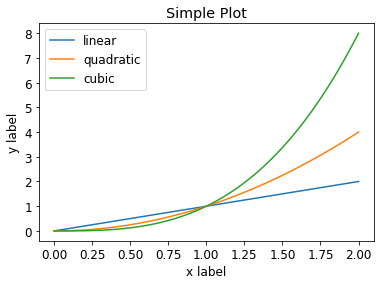

In [97]:
x = np.linspace(0,2,100)

plt.plot(x, x, label='linear')
plt.plot(x, x**2, label='quadratic')
plt.plot(x, x**3, label='cubic')
plt.xlabel('x label')
plt.ylabel('y label')
plt.title('Simple Plot')
plt.legend()
plt.savefig('/content/drive/My Drive/sample_plot')

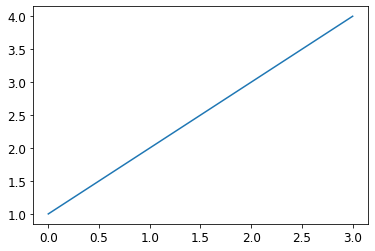

In [98]:
plt.plot([1,2,3,4])
plt.show()

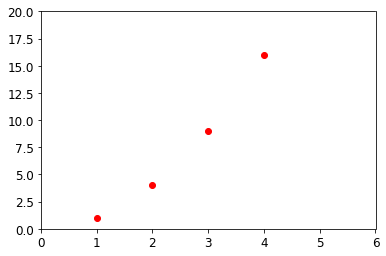

In [99]:
plt.plot([1,2,3,4], [1,4,9,16], 'ro')
plt.axis([0,6,0,20])
plt.show()

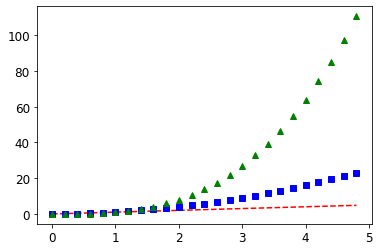

In [100]:
x = np.arange(0, 5, 0.2)
plt.plot(x, x, 'r--', x, x**2, 'bs', x, x**3, 'g^')
plt.show()

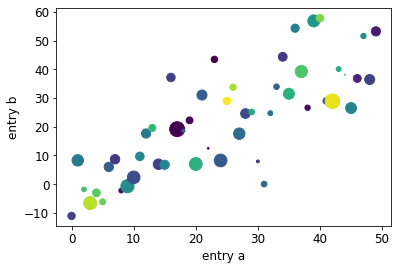

In [101]:
data = {
    'a': np.arange(50),
    'c': np.random.randint(0, 50, 50),
    'd': np.random.randn(50)
}
data['b'] = data['a'] + 10*np.random.randn(50)
data['d'] = np.abs(data['d']) * 100

plt.scatter('a', 'b', c='c', s='d', data=data)
plt.xlabel('entry a')
plt.ylabel('entry b')
plt.show()

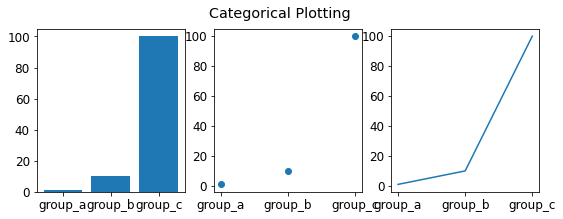

In [102]:
names = ['group_a', 'group_b', 'group_c']
values = [1, 10, 100]

plt.figure(figsize=(9, 3))

plt.subplot(131)
plt.bar(names, values)
plt.subplot(132)
plt.scatter(names, values)
plt.subplot(133)
plt.plot(names, values)
plt.suptitle('Categorical Plotting')
plt.show()

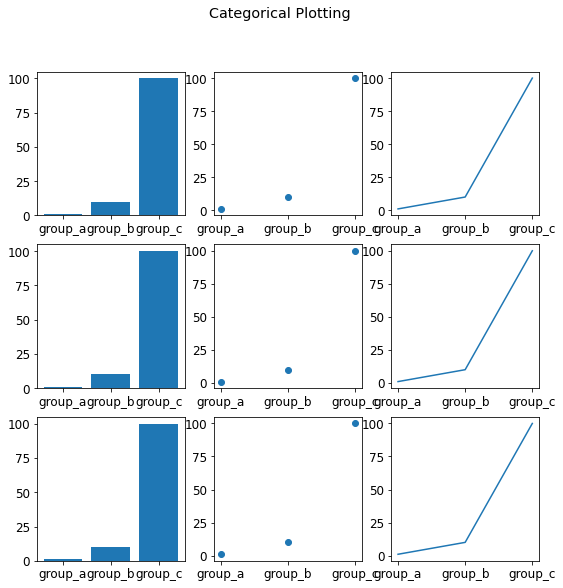

In [103]:
plt.figure(figsize=(9,9))

i = 1
while i < 10:
  plt.subplot(3,3,i)
  plt.bar(names, values)
  i += 1
  plt.subplot(3,3,i)
  plt.scatter(names, values)
  i += 1
  plt.subplot(3,3,i)
  plt.plot(names, values)
  i += 1
plt.suptitle('Categorical Plotting')
plt.show()

In [0]:
# for col in overall:
#   print(overall[col].value_counts())
# print(overall['cost'].value_counts().to_numpy())
overall_counts_dict = {}
overall_counts = []
# store each column as a dictionary
for col in overall:
  overall_counts_dict[col] = overall[col].value_counts().to_dict()
  # put counts from dictionaries into a list in numerical order of keys
  for i in range(0,6):
    if i not in overall_counts_dict[col]:
      overall_counts_dict[col][i] = 0

# create a list of counts for each response value
for i in range(0,6):
  value_list = []
  for cat in overall_counts_dict:
    value_list.append(overall_counts_dict[cat][i])
  overall_counts.append(value_list)

In [105]:
print(overall_counts)

[[3, 0, 1, 0, 5, 0, 0, 8], [6, 2, 0, 2, 3, 0, 0, 5], [2, 3, 4, 0, 6, 1, 3, 3], [6, 6, 4, 8, 2, 4, 4, 3], [1, 9, 5, 3, 4, 6, 5, 1], [2, 0, 6, 7, 0, 9, 8, 0]]


In [106]:
len(overall_counts)

6

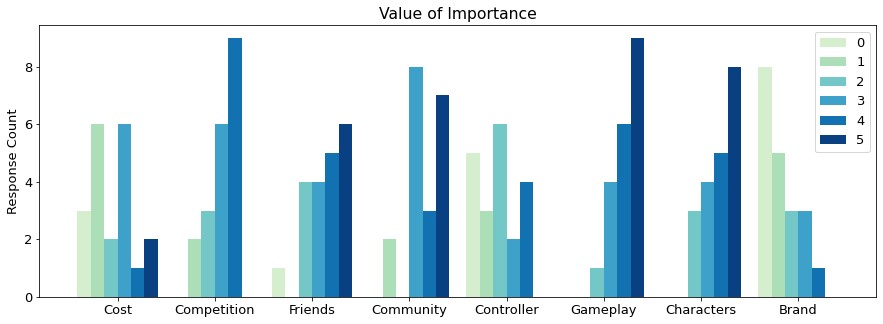

In [119]:
groups = len(overall_counts)
group_count = len(overall_counts[0])

font = {'size': 13}
rc('font', **font)

fig, ax = plt.subplots(figsize=(15,5))
ind = np.arange(group_count)
group_width = 1.1
width = group_width / group_count
colors = cm.GnBu(np.linspace(.20,1,6))

for i in range(0,groups):
  bar = ax.bar(ind + ((i-2) * (group_width/group_count)) - group_width/group_count/2, overall_counts[i], width, label=str(i), color=colors[i])
  bar

ax.set_ylabel('Response Count', fontsize='medium')
ax.set_title('Value of Importance')
ax.set_xticks(ind)
ax.set_xticklabels([cat.capitalize() for cat in overall_counts_dict])
ax.legend()

In [108]:
overall_describe = overall.describe()
overall_describe

,cost,competition,friends,community,controller,gameplay,characters,brand
count,20.000000,20.000000,20.000000,20.000000,20.000000,20.000000,20.00000,20.000000
mean,2.100000,3.100000,3.500000,3.650000,1.850000,4.150000,3.90000,1.200000
std,1.552587,1.020836,1.395481,1.268028,1.460894,0.933302,1.11921,1.281447
min,0.000000,1.000000,0.000000,1.000000,0.000000,2.000000,2.00000,0.000000
25%,1.000000,2.750000,2.750000,3.000000,0.750000,3.750000,3.00000,0.000000
50%,2.000000,3.000000,4.000000,3.500000,2.000000,4.000000,4.00000,1.000000
75%,3.000000,4.000000,5.000000,5.000000,3.000000,5.000000,5.00000,2.000000
max,5.000000,4.000000,5.000000,5.000000,4.000000,5.000000,5.00000,4.000000


[Text(0, 0, 'Cost'),
 Text(0, 0, 'Competition'),
 Text(0, 0, 'Friends'),
 Text(0, 0, 'Community'),
 Text(0, 0, 'Controller'),
 Text(0, 0, 'Gameplay'),
 Text(0, 0, 'Characters'),
 Text(0, 0, 'Brand')]

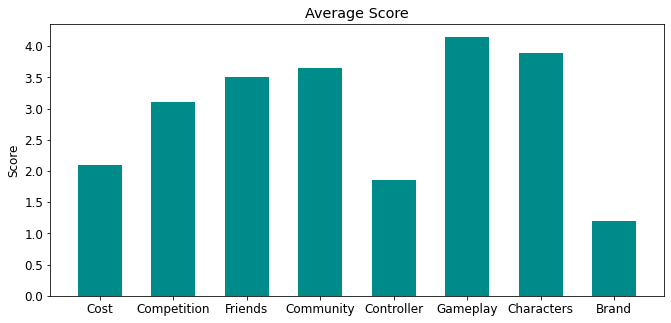

In [109]:
means = list(overall_describe.iloc[1])

font = {'size': 12}
rc('font', **font)

fig, ax = plt.subplots(figsize=(11,5))
ind = np.arange(len(means))
bar = ax.bar(ind, means, width=0.6, color='darkcyan')

ax.set_ylabel('Score')
ax.set_title('Average Score')
ax.set_xticks(ind)
ax.set_xticklabels([cat.capitalize() for cat in overall_counts_dict])

[Text(0, 0, 'Cost'),
 Text(0, 0, 'Competition'),
 Text(0, 0, 'Friends'),
 Text(0, 0, 'Community'),
 Text(0, 0, 'Controller'),
 Text(0, 0, 'Gameplay'),
 Text(0, 0, 'Characters'),
 Text(0, 0, 'Brand')]

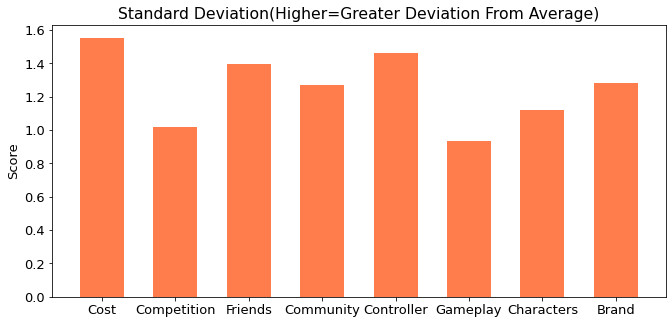

In [110]:
stds = list(overall_describe.iloc[2])

font = {'size': 13}
rc('font', **font)

fig, ax = plt.subplots(figsize=(11,5))
ind = np.arange(len(stds))
bar = ax.bar(ind, stds, width=0.6, color='orangered', alpha=0.7)

ax.set_ylabel('Score')
ax.set_title('Standard Deviation(Higher=Greater Deviation From Average)')
ax.set_xticks(ind)
ax.set_xticklabels([cat.capitalize() for cat in overall_counts_dict])

In [111]:
game_counts = games['name'].value_counts()
game_counts

UNI                11
SF                  7
BB                  6
DBFZ                3
MK                  3
Tekken              3
SamSho              2
SSBU                2
P4A                 1
SG                  1
KI                  1
SSBM                1
BBTAG               1
GG                  1
Martial Masters     1
SSB                 1
GBVS                1
Name: name, dtype: int64

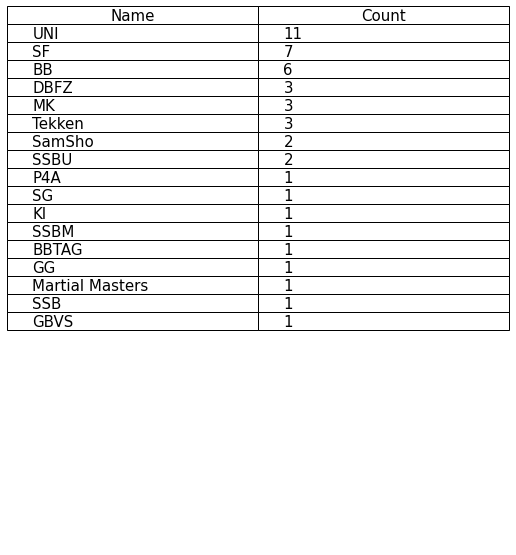

In [112]:
cellText = []
for name, count in game_counts.iteritems():
  cellText.append([name, str(count)])

fig, ax = plt.subplots()
# hide axes
fig.patch.set_visible(False)
ax.axis('off')
ax.axis('tight')

table = ax.table(cellText=cellText, colLabels=['Name', 'Count'], loc='top', cellLoc='left')
table.set_fontsize(15)
table.scale(1.5,1.5)

In [0]:
game_names_pie = []
game_counts_pie = []
other_sum = 0

for name, count in game_counts.iteritems():
  if count > 1:
    game_names_pie.append(name)
    game_counts_pie.append(count)
  else:
    other_sum += count

if other_sum > 0:
  game_names_pie.append('Other')
  game_counts_pie.append(other_sum)

Text(0.5, 1.0, 'Game Responses')

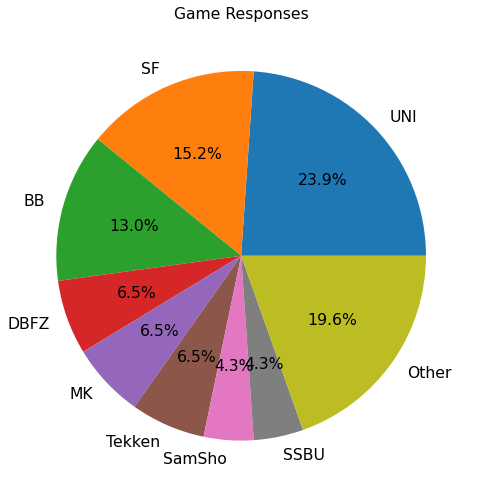

In [114]:
fig, ax = plt.subplots(figsize=(8.5,8.5))
patches, texts, autotexts = ax.pie(game_counts_pie, labels=game_names_pie, autopct='%1.1f%%')
for text in texts:
  text.set_fontsize('large')
for text in autotexts:
  text.set_fontsize('large')
ax.set_title('Game Responses')

In [115]:
games_grouped = games.groupby('name')
for name, group in games_grouped:
  print(name, games['name'].value_counts()[name], group.mean())

BB 6 cost           1.500000
scene          2.500000
friends        3.500000
netplay        1.000000
gameplay       4.833333
characters     4.666667
dev_support    1.333333
brand          1.833333
music          4.333333
visual         4.333333
dtype: float64
BBTAG 1 cost           2.0
scene          4.0
friends        5.0
netplay        5.0
gameplay       5.0
characters     4.0
dev_support    4.0
brand          3.0
music          4.0
visual         5.0
dtype: float64
DBFZ 3 cost           1.333333
scene          2.000000
friends        1.666667
netplay        1.666667
gameplay       4.000000
characters     4.666667
dev_support    3.666667
brand          4.333333
music          3.666667
visual         4.333333
dtype: float64
GBVS 1 cost           2.0
scene          2.0
friends        4.0
netplay        2.0
gameplay       4.0
characters     3.0
dev_support    4.0
brand          5.0
music          2.0
visual         5.0
dtype: float64
GG 1 cost           0.0
scene          0.0
friends   

In [116]:
for name, group in games_grouped:
  print(name)

BB
BBTAG
DBFZ
GBVS
GG
KI
MK
Martial Masters
P4A
SF
SG
SSB
SSBM
SSBU
SamSho
Tekken
UNI


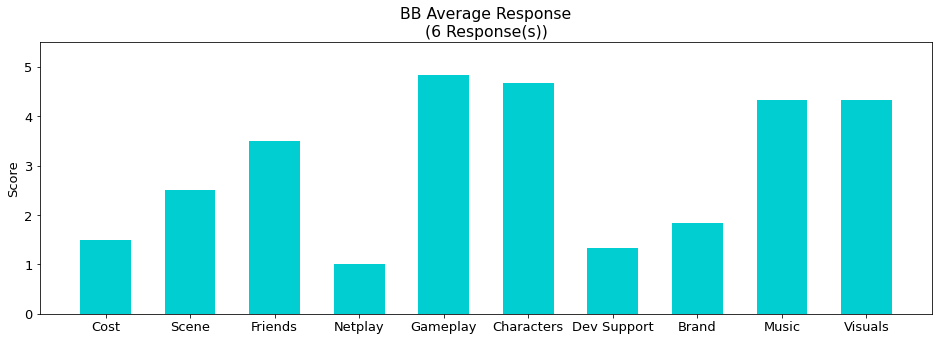

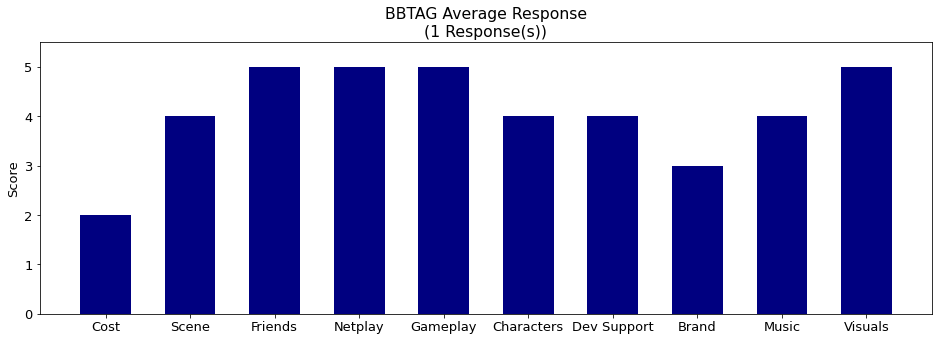

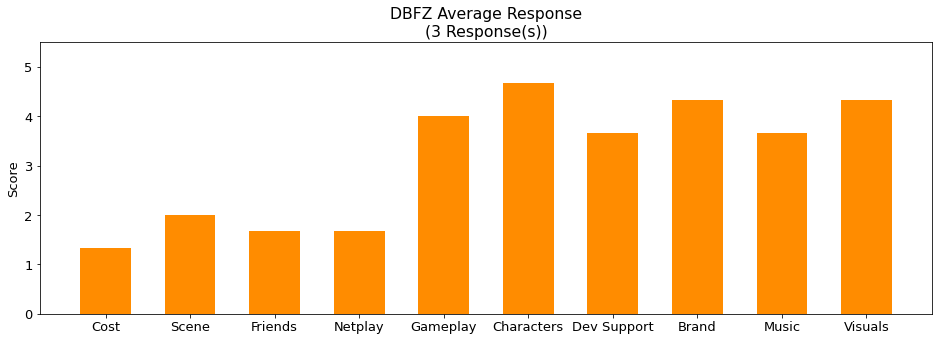

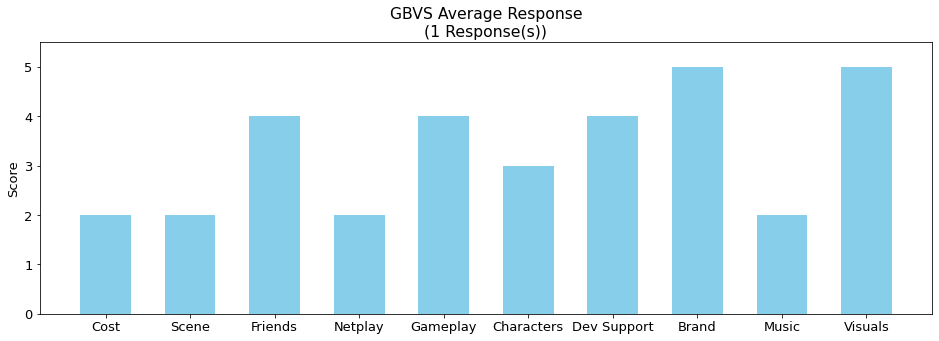

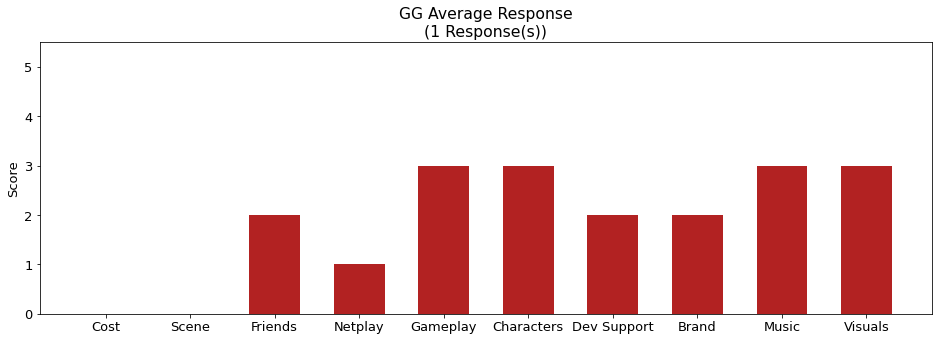

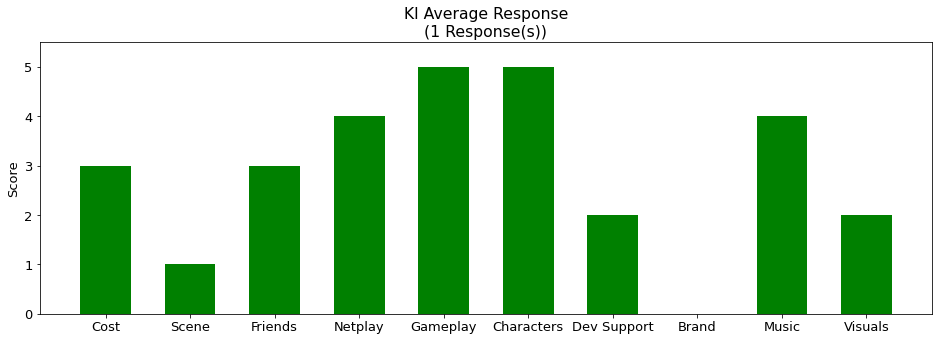

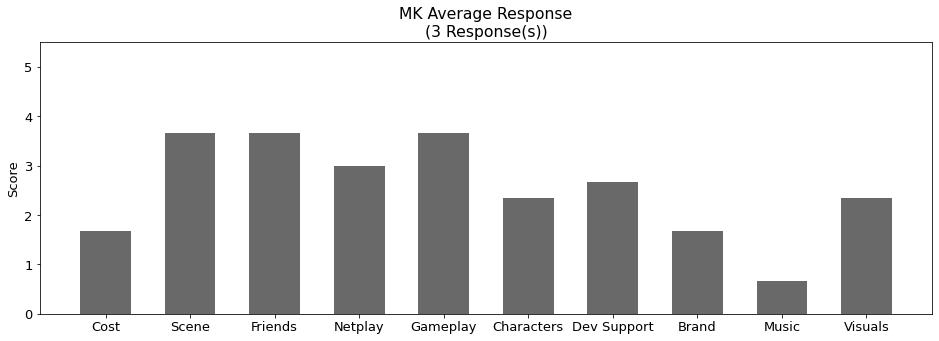

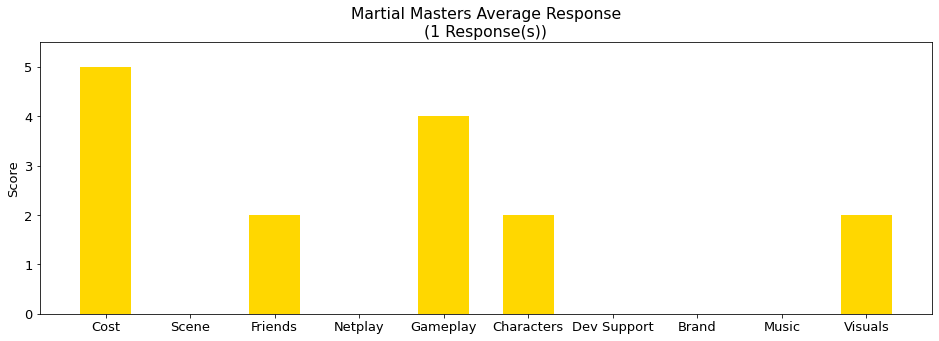

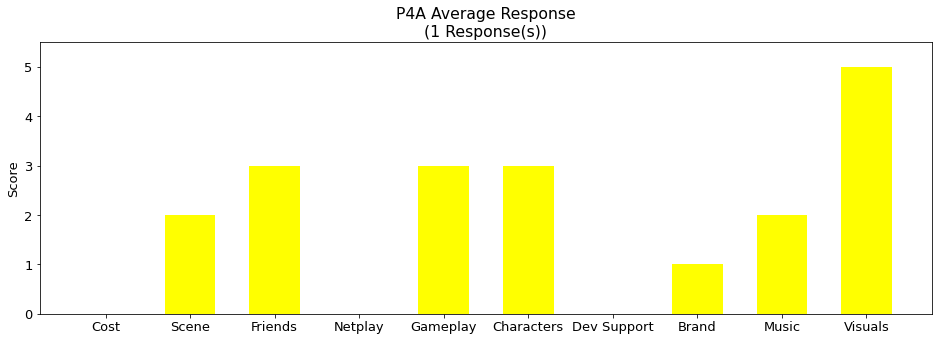

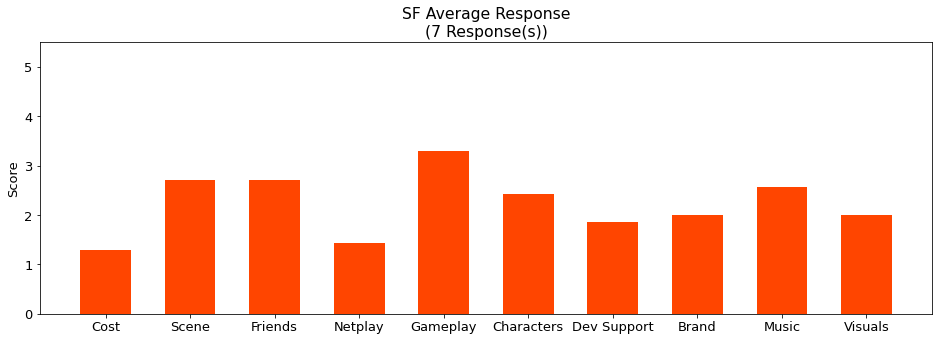

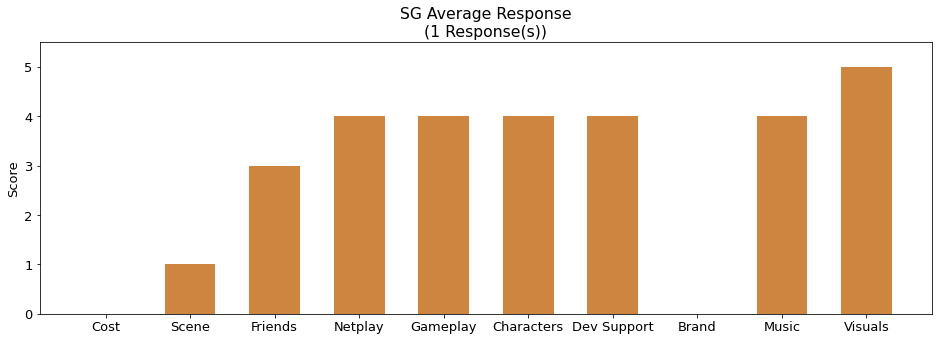

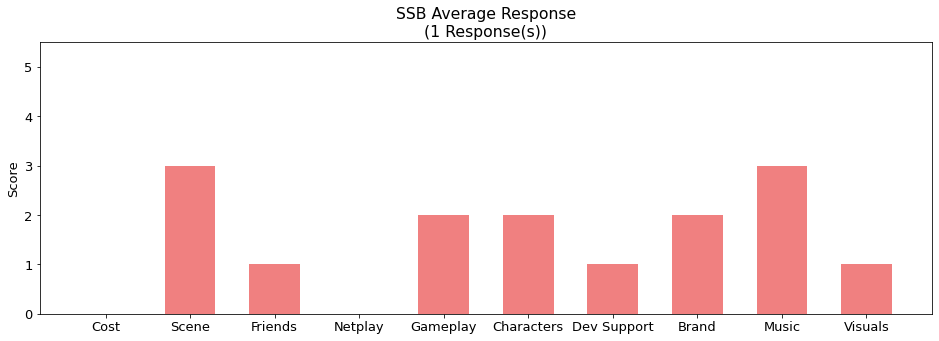

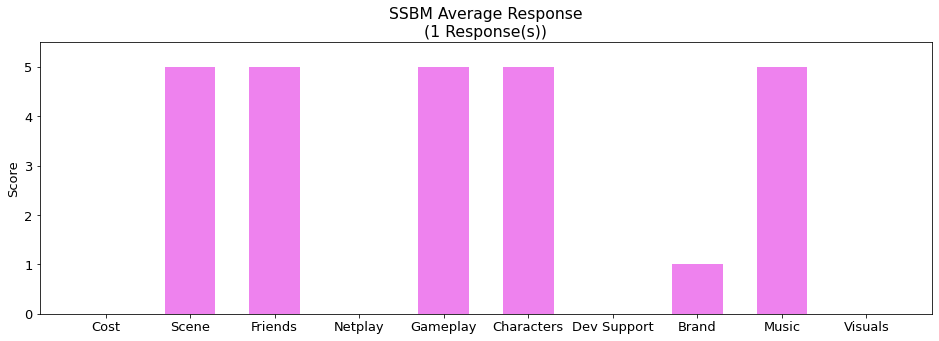

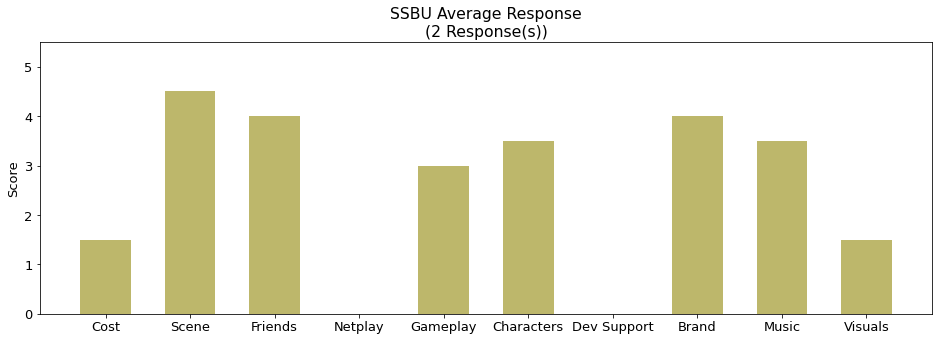

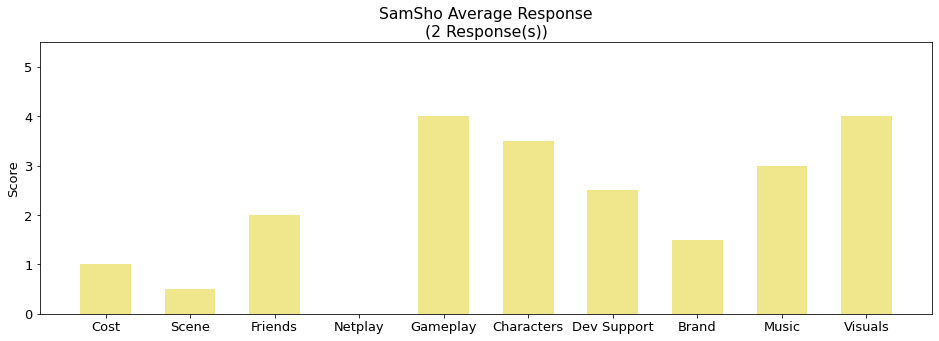

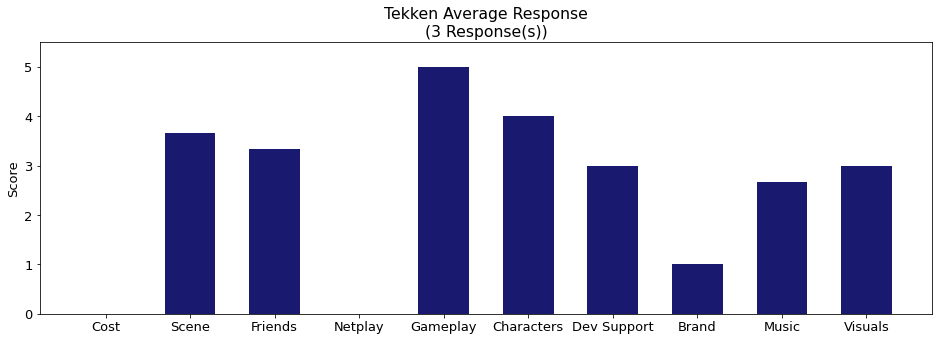

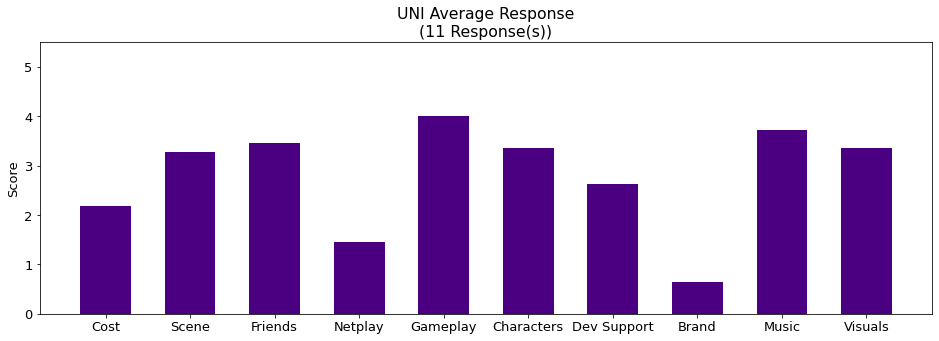

In [117]:
font = {'size': 13}
rc('font', **font)

game_colors = ['darkturquoise','navy','darkorange','skyblue','firebrick','green','dimgray','gold',
               'yellow','orangered','peru','lightcoral','violet','darkkhaki','khaki','midnightblue','indigo']
color_ind = 0

games_grouped = games.groupby('name')
ind = np.arange(len(games.columns) - 1)
labels = list(group.mean().index)
labels = list(map(lambda cat: cat.capitalize(), labels))
labels[6] = 'Dev Support'
labels[9] = 'Visuals'

for name, group in games_grouped:
  group_count = games['name'].value_counts()[name]
  
  means = list(group.mean().to_numpy())

  fig, ax = plt.subplots(figsize=(16,5))
  bar = ax.bar(ind, means, width=0.6, color=game_colors[color_ind])
  ax.set_ylabel('Score')
  ax.set_title(name + ' Average Response\n(' + str(group_count) + ' Response(s))')
  ax.set_xticks(ind)
  ax.set_xticklabels(labels)
  ax.set_ylim(top=5.5)
  fig.show()

  color_ind += 1
